In [1]:
import torch
import numpy as np
import torchvision
import torchio as tio
from lib.data import *
from lib.utils import *
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm
from pathlib import Path

In [2]:
root = Path('data')
images_dir = root / 'images'
labels_dir = root / 'labels'

images = sorted(images_dir.glob('*.nii.gz'))
labels = sorted(labels_dir.glob('*.nii.gz'))

In [3]:
dataset = get_dataset_from_path(images, labels)

In [4]:
# get_histogram_plot(dataset)

In [5]:
# histogram_landmarks_path = 'NFBS_histogram_landmarks.npy'

# landmarks = tio.HistogramStandardization.train(
#     images,
#     output_path=histogram_landmarks_path,
# )

# np.set_printoptions(suppress=True, precision=3)
# print('\nTrained landmarks:', landmarks)


In [6]:
# get_histogram_plot(dataset, use_histogram=True, landmarks=histogram_landmarks_path)

In [ ]:
training_set, validation_set = get_datasets(images, labels, volume="whole")

In [ ]:
a = training_set[124]
a.plot()
print(a.mri)
print(a.brain)

In [ ]:
a = validation_set[5]
a.plot()
print(a.mri)
print(a.brain)

In [ ]:
train_loader = torch.utils.data.DataLoader(training_set, batch_size=16, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation_set, batch_size=16)

In [ ]:
k = 32
batch = next(iter(train_loader))
batch_mri = batch['mri'][tio.DATA][..., k]
batch_label = batch['brain'][tio.DATA][:, 1:, ..., k]
slices = torch.cat((batch_mri, batch_label))
image_path = 'batch_whole_images.png'
torchvision.utils.save_image(
    slices,
    image_path,
    nrow=16//2,
    normalize=True,
    scale_each=True,
    padding=0,
)
display.Image(image_path)

In [7]:
training_set, validation_set = get_datasets(images, labels, volume="patches")

Dataset: 125 Images
Training set: 113 Images
Validation set: 12 Images


C:\Program Files\Python37\lib\site-packages\torchio\data\queue.py:215: RuntimeWarning: Queue length (300) not divisible by the number of patches per volume (16)
  warnings.warn(message, RuntimeWarning)


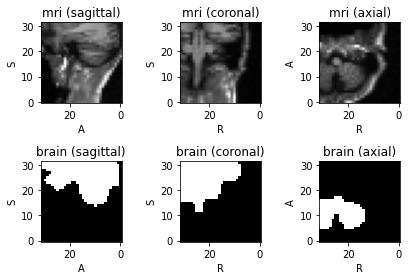

ScalarImage(shape: (1, 32, 32, 32); spacing: (4.00, 4.00, 4.00); orientation: RAS+; memory: 128.0 KiB; dtype: torch.FloatTensor)
LabelMap(shape: (2, 32, 32, 32); spacing: (4.00, 4.00, 4.00); orientation: RAS+; memory: 256.0 KiB; dtype: torch.FloatTensor)


In [8]:
a = training_set[124]
a.plot()
print(a.mri)
print(a.brain)

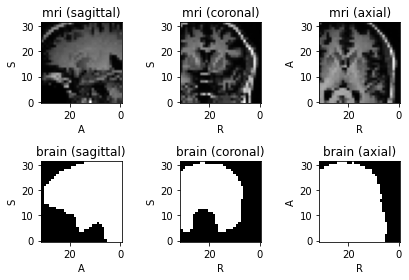

ScalarImage(shape: (1, 32, 32, 32); spacing: (4.00, 4.00, 4.00); orientation: RAS+; memory: 128.0 KiB; dtype: torch.FloatTensor)
LabelMap(shape: (2, 32, 32, 32); spacing: (4.00, 4.00, 4.00); orientation: RAS+; memory: 256.0 KiB; dtype: torch.FloatTensor)


In [9]:
a = validation_set[5]
a.plot()
print(a.mri)
print(a.brain)

In [10]:
train_loader = torch.utils.data.DataLoader(training_set, batch_size=16, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation_set, batch_size=16)

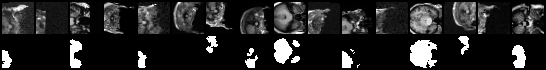

In [11]:
batch = next(iter(train_loader))
k = int(32 // 4)
batch_mri = batch['mri'][tio.DATA][..., k]
batch_label = batch['brain'][tio.DATA][:, 1:, ..., k]
slices = torch.cat((batch_mri, batch_label))
image_path = 'batch_patches.png'
torchvision.utils.save_image(
    slices,
    image_path,
    nrow=16,
    normalize=True,
    scale_each=True,
)
display.Image(image_path)